In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

# Define paths
fear_path = '/content/drive/MyDrive/primetrade_ds_assignment/fear_greed_index.csv'
historical_path = '/content/drive/MyDrive/primetrade_ds_assignment/historical_data.csv'

# Load the CSV files
df_sentiment = pd.read_csv(fear_path)
df_trades = pd.read_csv(historical_path)

# Preview
print("Sentiment Data:")
print(df_sentiment.head())

print("\nTrader Data:")
print(df_trades.head())


Sentiment Data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1

In [4]:
# Convert 'date' to datetime
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])

# Simplify sentiment classification
def simplify_sentiment(label):
    if 'Fear' in label:
        return 'Fear'
    elif 'Greed' in label:
        return 'Greed'
    else:
        return 'Neutral'

df_sentiment['Sentiment'] = df_sentiment['classification'].apply(simplify_sentiment)

# Preview cleaned sentiment data
df_sentiment[['date', 'value', 'classification', 'Sentiment']].head()


,date,value,classification,Sentiment
0,2018-02-01,30,Fear,Fear
1,2018-02-02,15,Extreme Fear,Fear
2,2018-02-03,40,Fear,Fear
3,2018-02-04,24,Extreme Fear,Fear
4,2018-02-05,11,Extreme Fear,Fear


In [5]:
# Convert 'Timestamp' from milliseconds to datetime
df_trades['Timestamp'] = pd.to_datetime(df_trades['Timestamp'], unit='ms')

# Create a 'date' column to align with sentiment data
df_trades['date'] = df_trades['Timestamp'].dt.date

# Drop the string-based 'Timestamp IST' if you want
df_trades.drop(columns=['Timestamp IST'], inplace=True)

# Preview cleaned result
df_trades[['Account', 'Coin', 'Closed PnL', 'Timestamp', 'date']].head()


,Account,Coin,Closed PnL,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-10-27 03:33:20,2024-10-27


In [6]:
df_sentiment['date_only'] = df_sentiment['date'].dt.date

In [7]:
df_merged = pd.merge(
    df_trades,
    df_sentiment[['date_only', 'Sentiment']],
    left_on='date',
    right_on='date_only',
    how='left'
)

# Clean up extra column
df_merged.drop(columns=['date_only'], inplace=True)

# Preview merged data
df_merged[['Account', 'Coin', 'Closed PnL', 'date', 'Sentiment']].head()


,Account,Coin,Closed PnL,date,Sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,2024-10-27,Greed


In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Start Position    211224 non-null  float64       
 7   Direction         211224 non-null  object        
 8   Closed PnL        211224 non-null  float64       
 9   Transaction Hash  211224 non-null  object        
 10  Order ID          211224 non-null  int64         
 11  Crossed           211224 non-null  bool          
 12  Fee               211224 non-null  float64       
 13  Trade ID          211224 non-null  float64       
 14  Time

In [9]:
# check duplicates
df_merged.duplicated().sum()

np.int64(0)

In [10]:
# count of traders
df_merged['Account'].nunique()

32

In [11]:
#Pie Chart of Trade Counts & Trade Volume by Sentiment

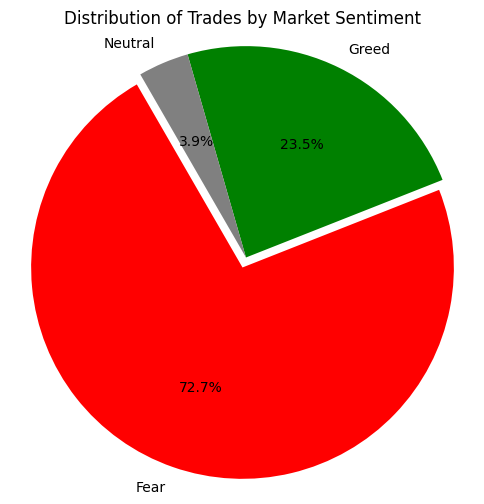

In [12]:
import matplotlib.pyplot as plt

# Count number of trades under each sentiment
sentiment_counts = df_merged['Sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=120,
    colors=['red', 'green', 'gray'],  # Customize colors
    explode=[0.05 if i == sentiment_counts.idxmax() else 0 for i in sentiment_counts.index]
)
plt.title('Distribution of Trades by Market Sentiment')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle

# Save to drive
plt.savefig('/content/drive/My Drive/primetrade_ds_assignment/outputs/trade_distribution_pie.png')
plt.show()


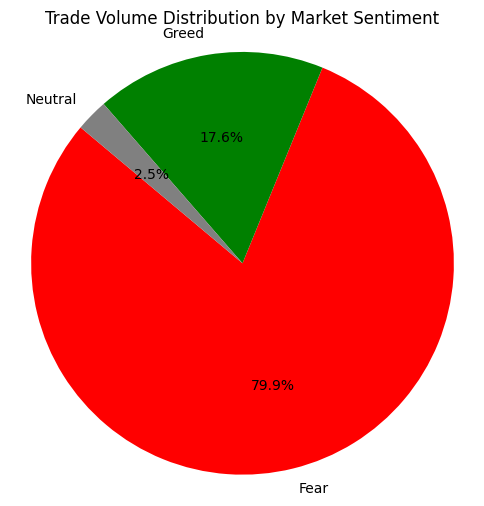

In [13]:
# Sum Size USD per sentiment (total capital traded)
volume_by_sentiment = df_merged.groupby('Sentiment')['Size USD'].sum()

# Plot volume-based pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    volume_by_sentiment,
    labels=volume_by_sentiment.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['red', 'green', 'gray']
)
plt.title('Trade Volume Distribution by Market Sentiment')
plt.axis('equal')
plt.savefig('/content/drive/My Drive/primetrade_ds_assignment/outputs/trade_volume_pie.png')
plt.show()


In [14]:
# Sentiment Trend Over Time

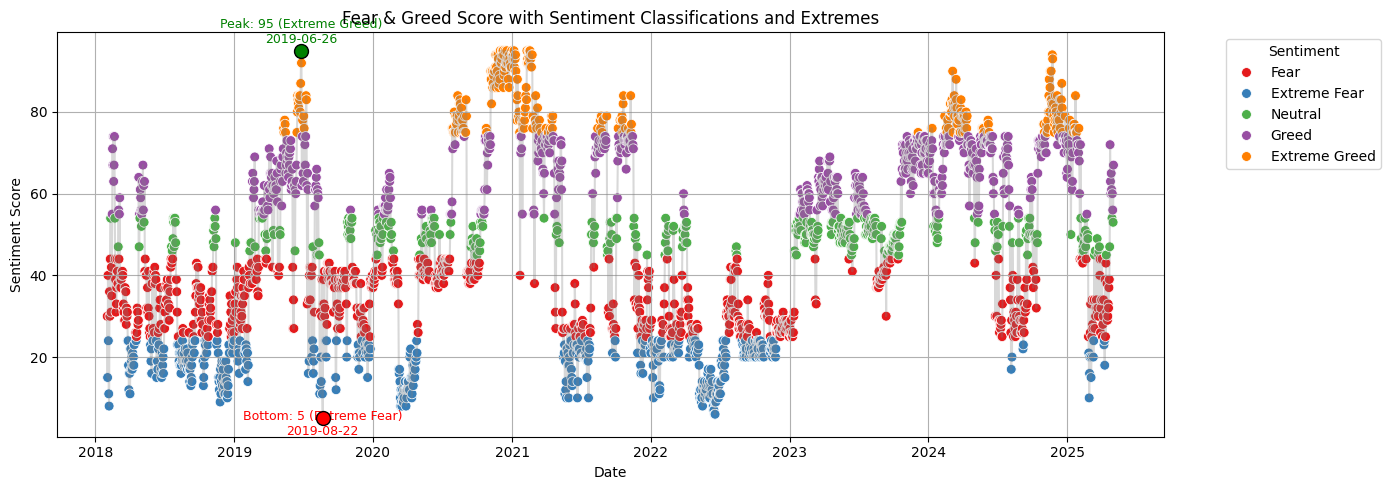

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find highest and lowest sentiment
max_point = df_sentiment.loc[df_sentiment['value'].idxmax()]
min_point = df_sentiment.loc[df_sentiment['value'].idxmin()]

plt.figure(figsize=(14, 5))

# Plot the base sentiment trend
sns.scatterplot(
    x='date',
    y='value',
    hue='classification',
    palette='Set1',
    data=df_sentiment,
    s=50
)

# Overlay a faint line to show trend
plt.plot(df_sentiment['date'], df_sentiment['value'], color='gray', alpha=0.3)

# Annotate Max Point (Greed peak)
plt.scatter(max_point['date'], max_point['value'], color='green', s=100, edgecolor='black', zorder=5)
plt.text(max_point['date'], max_point['value'] + 2,
         f"Peak: {max_point['value']} ({max_point['classification']})\n{max_point['date'].strftime('%Y-%m-%d')}",
         fontsize=9, ha='center', color='green')

# Annotate Min Point (Fear bottom)
plt.scatter(min_point['date'], min_point['value'], color='red', s=100, edgecolor='black', zorder=5)
plt.text(min_point['date'], min_point['value'] - 4,
         f"Bottom: {min_point['value']} ({min_point['classification']})\n{min_point['date'].strftime('%Y-%m-%d')}",
         fontsize=9, ha='center', color='red')

# Final polish
plt.title('Fear & Greed Score with Sentiment Classifications and Extremes')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save it
plt.savefig('/content/drive/My Drive/primetrade_ds_assignment/outputs/sentiment_trend_annotated.png')
plt.show()


In [16]:
# PnL Distribution by Market Sentiment

/tmp/ipython-input-17-1064267053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged, x='Sentiment', y='Closed PnL', palette='Set2')


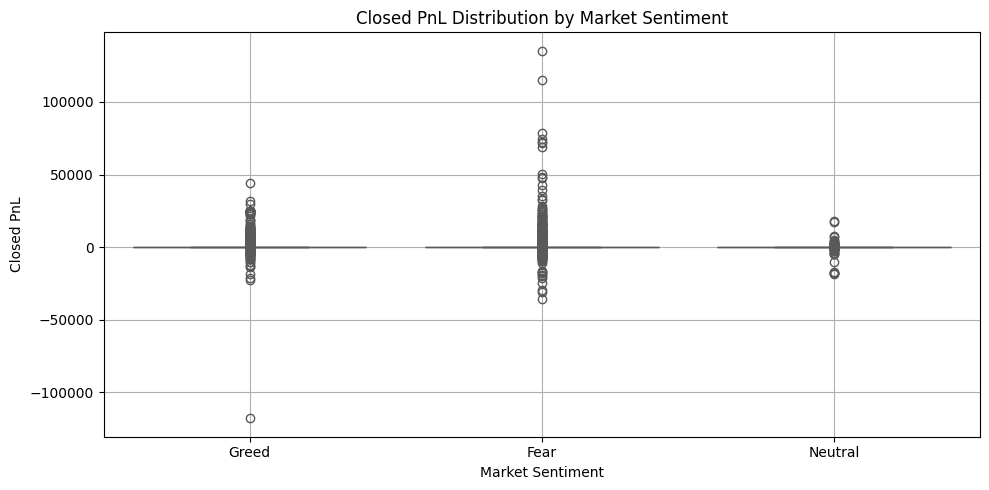

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_merged, x='Sentiment', y='Closed PnL', palette='Set2')
plt.title('Closed PnL Distribution by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/primetrade_ds_assignment/outputs/pnl_by_sentiment.png')
plt.show()


In [18]:
# Averages
 # Group by sentiment
agg_stats = df_merged.groupby('Sentiment')[['Closed PnL', 'Size USD', 'Fee']].mean().reset_index()

print(agg_stats)


  Sentiment  Closed PnL     Size USD       Fee
0      Fear   50.047622  5259.977837  1.083267
1     Greed   77.838247  3581.661513  0.720141
2   Neutral   22.229713  3058.848110  1.224461


In [19]:
#trader performance indicators - Win Rate, ROI, and Sharpe Ratio

In [20]:
# Win Rate
# Create a win flag
df_merged['is_win'] = df_merged['Closed PnL'] > 0

# Calculate win rate per sentiment
win_rate = df_merged.groupby('Sentiment')['is_win'].mean() * 100
print(win_rate)

Sentiment
Fear       41.514592
Greed      45.349240
Neutral    31.718247
Name: is_win, dtype: float64


In [21]:
# ROI
# Avoid divide-by-zero
df_merged['Size USD'] = df_merged['Size USD'].replace(0, 1)

# Compute ROI for each trade
df_merged['ROI'] = (df_merged['Closed PnL'] / df_merged['Size USD']) * 100

# Average ROI per sentiment
roi_by_sentiment = df_merged.groupby('Sentiment')['ROI'].mean()
print(roi_by_sentiment)


Sentiment
Fear       1.135709
Greed      5.408628
Neutral    1.521810
Name: ROI, dtype: float64


In [22]:
# Sharpe Ratio
# Group by sentiment and compute Sharpe-like ratio
sharpe_ratio = df_merged.groupby('Sentiment')['ROI'].agg(lambda x: x.mean() / x.std())
print(sharpe_ratio)

Sentiment
Fear       0.010746
Greed      0.307678
Neutral    0.181574
Name: ROI, dtype: float64


In [23]:
ov_performance_indicators = pd.concat([win_rate, roi_by_sentiment, sharpe_ratio], axis=1)
ov_performance_indicators.columns = ['Win Rate', 'ROI', 'Sharpe Ratio']
print(ov_performance_indicators)

            Win Rate       ROI  Sharpe Ratio
Sentiment                                   
Fear       41.514592  1.135709      0.010746
Greed      45.349240  5.408628      0.307678
Neutral    31.718247  1.521810      0.181574


/tmp/ipython-input-24-1645669793.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipython-input-24-1645669793.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipython-input-24-1645669793.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


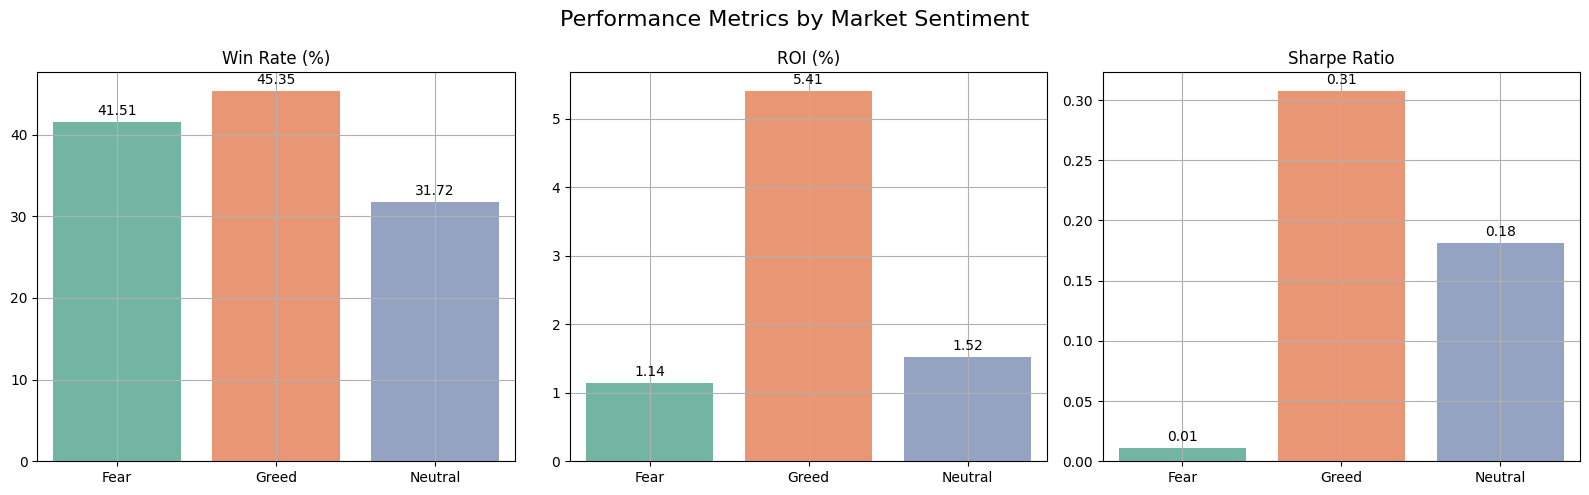

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom titles
custom_titles = {
    'Win Rate': 'Win Rate (%)',
    'ROI': 'ROI (%)',
    'Sharpe Ratio': 'Sharpe Ratio'
}

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, metric in enumerate(ov_performance_indicators.columns):
    # Create the barplot
    ax = axes[i]
    barplot = sns.barplot(
        x=ov_performance_indicators.index,
        y=ov_performance_indicators[metric],
        ax=ax,
        palette='Set2'
    )

    # Add value labels on top of bars
    for container in ax.containers:
        ax.bar_label(container,
                     fmt='%.2f',
                     label_type='edge',
                     fontsize=10,
                     padding=3)

    # Title and styling
    ax.set_title(custom_titles.get(metric, metric), fontsize=12)
    ax.grid(True)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Overall title
plt.suptitle('Performance Metrics by Market Sentiment', fontsize=16)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/primetrade_ds_assignment/outputs/sentiment_metrics_split_labeled.png')
plt.show()


In [25]:
#Top-Performing Traders per Sentiment

/tmp/ipython-input-26-3218625414.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


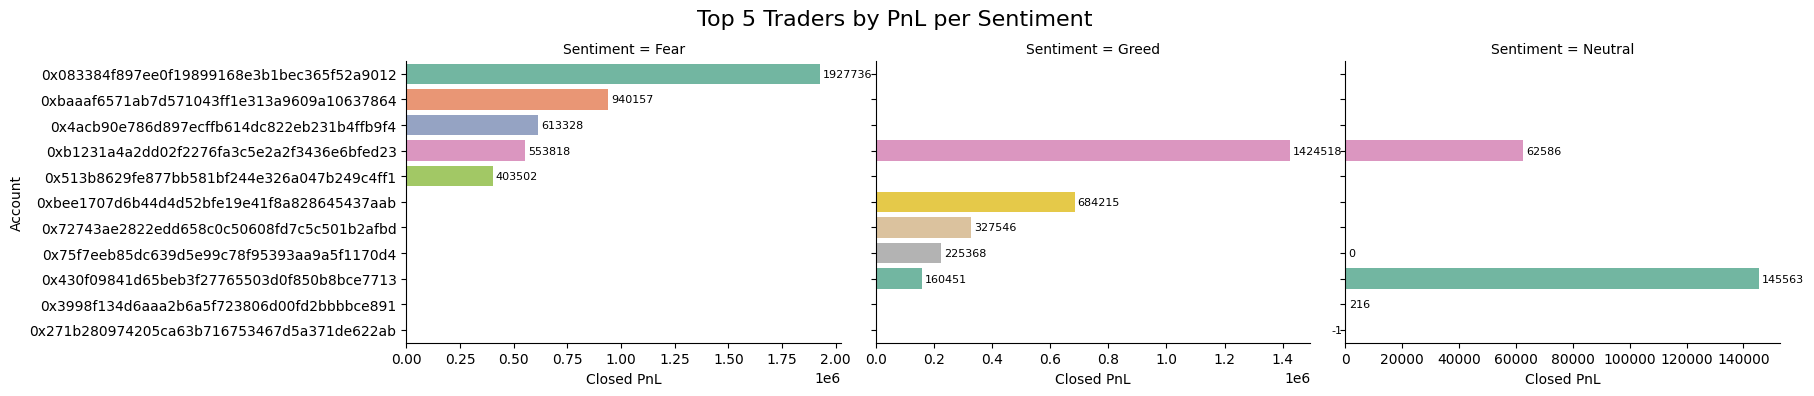

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
trader_sentiment_pnl = df_merged.groupby(['Sentiment', 'Account'])['Closed PnL'].sum().reset_index()
top_n = 5
top_traders = trader_sentiment_pnl.sort_values(['Sentiment', 'Closed PnL'], ascending=[True, False])
top_traders_per_sentiment = top_traders.groupby('Sentiment').head(top_n).reset_index(drop=True)

# Plot using catplot
g = sns.catplot(
    data=top_traders_per_sentiment,
    x='Closed PnL',
    y='Account',
    col='Sentiment',
    kind='bar',
    col_wrap=3,
    palette='Set2',
    height=4,
    aspect=1.5,
    sharex=False  # Allow scale to vary per sentiment
)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle(f'Top {top_n} Traders by PnL per Sentiment', fontsize=16)

# Add value labels
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=2, fontsize=8)

# Save it
g.savefig('/content/drive/My Drive/primetrade_ds_assignment/outputs/top_traders_facetgrid.png')
plt.show()


In [27]:
df_merged.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,Sentiment,is_win,ROI
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed,False,0.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed,False,0.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed,False,0.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed,False,0.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed,False,0.0


In [28]:
# Cleaned_csv

# Final columns to keep
cols_to_keep = [
    'Account', 'Size USD', 'Closed PnL', 'ROI', 'Fee',
    'Side', 'Direction', 'Sentiment', 'date', 'Timestamp', 'is_win'
]

df_cleaned = df_merged[cols_to_keep].copy()

# Save cleaned version
df_cleaned.to_csv('/content/drive/My Drive/primetrade_ds_assignment/csv_files/cleaned_trades.csv', index=False)